<div style="direction:rtl;line-height:300%;background-color:#282C34;border-radius: 25px;">
    <img src='https://me.ut.ac.ir/documents/84413608/105534126/%D9%86%D8%B4%D8%A7%D9%86%20%D8%AF%D8%A7%D9%86%D8%B4%DA%AF%D8%A7%D9%87%20%D8%AA%D9%87%D8%B1%D8%A7%D9%86_%D8%AD%D8%A7%D8%B4%DB%8C%D9%87_vectorized2.png?t=1617776323063' alt="UT logo" width="110" height="110" align="left" style='padding-top: 15px; padding-left: 20px;'>
    <img src="https://engstudent.ut.ac.ir/wp-content/uploads/Fanni-Transparent.png" width="150" height="112" align="right" style='padding-top: 15px; padding-right: 20px;'>
    <font face="XB Zar" size=5>
        <div align=center>
            <font face="IranNastaliq" size=30 color=white>
                <p></p>
                <p></p>
به نام خدا
            </font>
            <br />
            <br />
            <font color=#1597E5>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
            <font color=#69DADB>
هوش مصنوعی
            </font>
            <br />
            <font color=#FFA400>
پاییز ۱۴۰۰
        </div>
        <hr color=#6ECB63/>
        <font color=#FF5C58 size=6>
            <div align=center>
پروژه چهارم - یادگیری ماشین
            </div>
        </font>
        <br />
        <div align=center>
        <font color=yellow>
حسام اسداله‌زاده 
            <br />
            شماره دانشجویی: ۸۱۰۱۹۸۳۴۶
            </font>
        </div>
        <!hr color=#6ECB63/>
        <style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            

</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Phase #0:
## understanding data


In [5]:
df = pd.read_csv("drive/MyDrive/dataset.csv")
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### Q1: describing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


* except `release_year` which is a numerical data, other columns are represented by text.

In [7]:
df.isna().sum()

type               0
title              0
cast            1365
country         2695
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
df.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
print(len(df[df['type'] == 'Movie']), len(df[df['type'] == 'TV Show']))
print(len(df[df['type'] == 'Movie'])/len(df), len(df[df['type'] == 'TV Show'])/len(df))

6131 4928
0.5543900895198481 0.4456099104801519


In [10]:
df.duplicated().sum()

0

### Q2: missing data

* percentage:

In [11]:
df.isna().sum()/len(df)

type            0.000000
title           0.000000
cast            0.123429
country         0.243693
release_year    0.000000
listed_in       0.000000
description     0.000000
dtype: float64

# Phase #1:
## Preprocessing data

In [12]:
df[['cast', 'country']]

,cast,country
0,NaN,United States
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN
3,NaN,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India
...,...,...
11054,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States
11055,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States
11056,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States
11057,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada


In [13]:
val, cnt = np.unique(df['country'].dropna(), return_counts=True)
c = np.argsort(-cnt)

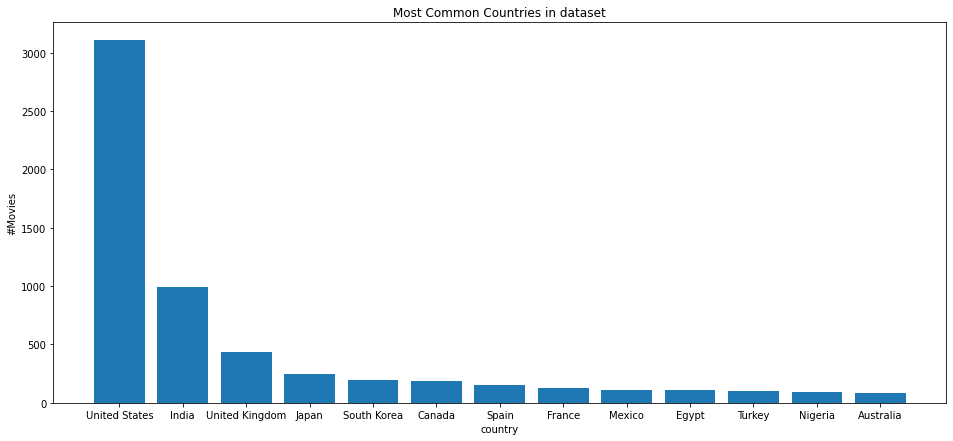

In [14]:
c_max = c[0:13]
fig, ax = plt.subplots(figsize=(16,7))
ax.bar(val[c_max], cnt[c_max])
ax.set_title('Most Common Countries in dataset')
ax.set_xlabel('country')
ax.set_ylabel('#Movies')
plt.show()

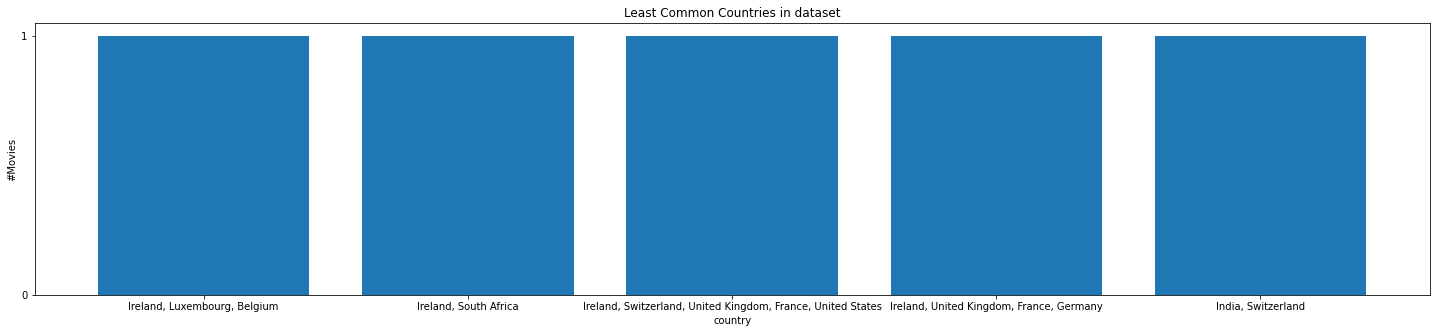

In [15]:
c_min = c[-6:-1]
fig, ax = plt.subplots(figsize=(25,5))
ax.bar(val[c_min], cnt[c_min])
ax.set_title('Least Common Countries in dataset')
ax.set_xlabel('country')
ax.set_ylabel('#Movies'), ax.set_yticks([0,1])
plt.show()

In [16]:
df['country'].mode()

0    United States
dtype: object

### NaN values:
* It's obvious that we cannot determine or interpolate NaN values of `cast` column. There's two ways to deal with them. To drop all rows with a `cast = NaN` or to assign them to an empty string (`''`). But we can use `mode()` in order to fill NaN values of `country` column. Obviously, we cannot use `mean()` or any other method in order to fill NaN values of countries.

In [17]:
df['cast'] = df['cast'].fillna(value="")
# df = df.dropna(subset=['cast'])
df = df.fillna(value=df['country'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          11059 non-null  object
 3   country       11059 non-null  object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


## Normalizing Data
* Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.
$$ X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}} $$

## Standardizing Data
* Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.
$$ X_{new} = \frac{X_{old} - mean}{Std} $$


- In our case, it's better to use `Normalizing` because our numerical column refers to *release year* of the films and normalizing these values can help our model. After normalizing, bigger values refer to newer films and vice versa. `Standardizing` could make some values negative and obviously it doesn't make sense in our case.

In [18]:
mms = sk.preprocessing.MinMaxScaler()
df_norm = df.copy(deep=True)
df_norm['release_year'] = mms.fit_transform(pd.DataFrame(df['release_year']))

df_norm

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,,United States,0.989583,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,,United States,1.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,0.781250,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,0.739583,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0.927083,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.947917,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


## Categorical Data Encoding:
* Label Encoding or Ordinal Encoding
* One hot Encoding
* Dummy Encoding
* Effect Encoding
* Binary Encoding
* BaseN Encoding
* Hash Encoding
* Target Encoding

### Label Encoding or Ordinal Encoding:
* We use this categorical data encoding technique when the categorical feature is ordinal (The categories have an inherent order). In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided. Like the **degree a person possesses**. Hence encoding should reflect the sequence.

### One-hot Encoding:
* We use this categorical data encoding technique when the features are nominal (do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1.


* we will use `LabelEncoder()` from `scikit-learn` to transform `country` column to numerical values. But there's no order and these values just represent a unique country in our dataset.

In [19]:
country_labelEncoder = sk.preprocessing.LabelEncoder()
df['country'] = country_labelEncoder.fit_transform(df['country'])

In [20]:
len(df['country'].unique()), df['country'].max()

(760, 759)

### `listed_in` column:
* First of all we should delete spaces (`' '`) from each cell because they can lead to confusion. Then, we split each column and generate three new columns: `Genre1` to `Genre3`. These columns represent three genres in which our movie/TV show listed in. Obviously, some entries are listed in less than three genres. So, we should fill None values of one or two columns for those rows. We use forward filling (`ffill()`) for this purpose.

In [21]:
df['listed_in'] = df['listed_in'].str.replace(' ', '')
genres_df = df['listed_in'].str.split(',', expand=True)
genres_df

,0,1,2,3,4
0,Documentaries,None,None,None,None
1,InternationalTVShows,TVDramas,TVMysteries,None,None
2,CrimeTVShows,InternationalTVShows,TVAction&Adventure,None,None
3,Docuseries,RealityTV,None,None,None
4,InternationalTVShows,RomanticTVShows,TVComedies,None,None
...,...,...,...,...,...
11054,Action-Adventure,Animation,Kids,None,None
11055,Comedy,ComingofAge,Kids,None,None
11056,Action-Adventure,Comedy,ComingofAge,None,None
11057,Action-Adventure,Comedy,ScienceFiction,None,None


In [22]:
df.insert(5, "Genre1", genres_df[0])
df.insert(6, "Genre2", genres_df[1])
df.insert(7, "Genre3", genres_df[2])
df.head()

,type,title,cast,country,release_year,Genre1,Genre2,Genre3,listed_in,description
0,Movie,Dick Johnson Is Dead,,608,2020,Documentaries,None,None,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,InternationalTVShows,TVDramas,TVMysteries,"InternationalTVShows,TVDramas,TVMysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,CrimeTVShows,InternationalTVShows,TVAction&Adventure,"CrimeTVShows,InternationalTVShows,TVAction&Adv...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,,608,2021,Docuseries,RealityTV,None,"Docuseries,RealityTV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,InternationalTVShows,RomanticTVShows,TVComedies,"InternationalTVShows,RomanticTVShows,TVComedies",In a city of coaching centers known to train I...


In [23]:
df = df.ffill(axis=1)
df.head()

,type,title,cast,country,release_year,Genre1,Genre2,Genre3,listed_in,description
0,Movie,Dick Johnson Is Dead,,608,2020,Documentaries,Documentaries,Documentaries,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,InternationalTVShows,TVDramas,TVMysteries,"InternationalTVShows,TVDramas,TVMysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,CrimeTVShows,InternationalTVShows,TVAction&Adventure,"CrimeTVShows,InternationalTVShows,TVAction&Adv...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,,608,2021,Docuseries,RealityTV,RealityTV,"Docuseries,RealityTV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,InternationalTVShows,RomanticTVShows,TVComedies,"InternationalTVShows,RomanticTVShows,TVComedies",In a city of coaching centers known to train I...


In [24]:
df.drop(columns=['listed_in'], inplace=True)
df.head()

,type,title,cast,country,release_year,Genre1,Genre2,Genre3,description
0,Movie,Dick Johnson Is Dead,,608,2020,Documentaries,Documentaries,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,InternationalTVShows,TVDramas,TVMysteries,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,CrimeTVShows,InternationalTVShows,TVAction&Adventure,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,,608,2021,Docuseries,RealityTV,RealityTV,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,InternationalTVShows,RomanticTVShows,TVComedies,In a city of coaching centers known to train I...


* Then, we need to transform these genres to numerical values:

In [25]:
genres_list = list(df['Genre1']) + list(df['Genre2']) + list(df['Genre3'])
map_genres = dict([(y,x+1) for x,y in enumerate(set(genres_list))])

In [26]:
df['Genre1'] = df['Genre1'].map(map_genres)
df['Genre2'] = df['Genre2'].map(map_genres)
df['Genre3'] = df['Genre3'].map(map_genres)

In [27]:
df['feature'] = df['title'] + ' ' + df['description']
df.drop(columns=['title', 'description'], inplace=True)
df

,type,cast,country,release_year,Genre1,Genre2,Genre3,feature
0,Movie,,608,2020,6,6,6,Dick Johnson Is Dead As her father nears the e...
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,45,56,75,"Blood & Water After crossing paths at a party,..."
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,59,45,90,Ganglands To protect his family from a powerfu...
3,TV Show,,608,2021,24,42,42,"Jailbirds New Orleans Feuds, flirtations and t..."
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,45,43,17,Kota Factory In a city of coaching centers kno...
...,...,...,...,...,...,...,...,...
11054,TV Show,"Noel Fisher, Vincent Gale, Christopher Judge, ...",608,2000,64,47,89,X-Men: Evolution X-Men: Evolution features the...
11055,TV Show,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",608,1996,25,23,89,Smart Guy A genius tries to fit in as a high s...
11056,TV Show,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",608,2014,64,25,23,Disney Kirby Buckets Welcome to Kirby's world!...
11057,TV Show,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",59,2016,64,25,68,Disney Mech-X4 Ryan discovers his ability to c...


### `CountVectorizer`:
* In previous cell, we joined to columns (`description`, `title`) and created a new column (`feature`). We'll use count vectorizer in order to extract 50 features from these sentences:

In [28]:
desc_vectorizer = CountVectorizer(analyzer='word', max_features=50, stop_words='english')
desc_features = desc_vectorizer.fit_transform(df['feature'])
print(desc_vectorizer.get_feature_names_out())

['adventures' 'best' 'boy' 'city' 'comedy' 'daughter' 'day' 'death'
 'documentary' 'family' 'father' 'finds' 'friend' 'friends' 'girl' 'group'
 'help' 'high' 'home' 'kids' 'life' 'little' 'lives' 'love' 'make' 'man'
 'mother' 'murder' 'new' 'old' 'save' 'school' 'secret' 'series' 'son'
 'special' 'stories' 'story' 'takes' 'team' 'time' 'town' 'true' 'war'
 'way' 'woman' 'world' 'year' 'years' 'young']


In [29]:
df_desc_vectorized = pd.DataFrame(desc_features.toarray(), columns=desc_vectorizer.get_feature_names_out()+'_dt', index=df.index)
df_desc_vectorized

,adventures_dt,best_dt,boy_dt,city_dt,comedy_dt,daughter_dt,day_dt,death_dt,documentary_dt,family_dt,father_dt,finds_dt,friend_dt,friends_dt,girl_dt,group_dt,help_dt,high_dt,home_dt,kids_dt,life_dt,little_dt,lives_dt,love_dt,make_dt,man_dt,mother_dt,murder_dt,new_dt,old_dt,save_dt,school_dt,secret_dt,series_dt,son_dt,special_dt,stories_dt,story_dt,takes_dt,team_dt,time_dt,town_dt,true_dt,war_dt,way_dt,woman_dt,world_dt,year_dt,years_dt,young_dt
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df = pd.concat([df, df_desc_vectorized], axis=1)
df.head()

,type,cast,country,release_year,Genre1,Genre2,Genre3,feature,adventures_dt,best_dt,boy_dt,city_dt,comedy_dt,daughter_dt,day_dt,death_dt,documentary_dt,family_dt,father_dt,finds_dt,friend_dt,friends_dt,girl_dt,group_dt,help_dt,high_dt,home_dt,kids_dt,life_dt,little_dt,lives_dt,love_dt,make_dt,man_dt,mother_dt,murder_dt,new_dt,old_dt,save_dt,school_dt,secret_dt,series_dt,son_dt,special_dt,stories_dt,story_dt,takes_dt,team_dt,time_dt,town_dt,true_dt,war_dt,way_dt,woman_dt,world_dt,year_dt,years_dt,young_dt
0,Movie,,608,2020,6,6,6,Dick Johnson Is Dead As her father nears the e...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,45,56,75,"Blood & Water After crossing paths at a party,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,59,45,90,Ganglands To protect his family from a powerfu...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,TV Show,,608,2021,24,42,42,"Jailbirds New Orleans Feuds, flirtations and t...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,45,43,17,Kota Factory In a city of coaching centers kno...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* We'll do the same thing with `cast` column:

In [31]:
df['cast'] = df['cast'].str.replace(' ', '')
df.head()

,type,cast,country,release_year,Genre1,Genre2,Genre3,feature,adventures_dt,best_dt,boy_dt,city_dt,comedy_dt,daughter_dt,day_dt,death_dt,documentary_dt,family_dt,father_dt,finds_dt,friend_dt,friends_dt,girl_dt,group_dt,help_dt,high_dt,home_dt,kids_dt,life_dt,little_dt,lives_dt,love_dt,make_dt,man_dt,mother_dt,murder_dt,new_dt,old_dt,save_dt,school_dt,secret_dt,series_dt,son_dt,special_dt,stories_dt,story_dt,takes_dt,team_dt,time_dt,town_dt,true_dt,war_dt,way_dt,woman_dt,world_dt,year_dt,years_dt,young_dt
0,Movie,,608,2020,6,6,6,Dick Johnson Is Dead As her father nears the e...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TV Show,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",430,2021,45,56,75,"Blood & Water After crossing paths at a party,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,TV Show,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",608,2021,59,45,90,Ganglands To protect his family from a powerfu...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,TV Show,,608,2021,24,42,42,"Jailbirds New Orleans Feuds, flirtations and t...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TV Show,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",254,2021,45,43,17,Kota Factory In a city of coaching centers kno...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
cast_vectorizer = CountVectorizer(analyzer='word', max_features=10, stop_words='english')
cast_features = cast_vectorizer.fit_transform(df['cast'])
print(cast_vectorizer.get_feature_names_out())

['anupamkher' 'eun' 'hee' 'ho' 'hyun' 'jin' 'min' 'shahrukhkhan' 'won'
 'young']


In [33]:
df_cast_vectorized = pd.DataFrame(cast_features.toarray(), columns=cast_vectorizer.get_feature_names_out()+'_c', index=df.index)
df_cast_vectorized

,anupamkher_c,eun_c,hee_c,ho_c,hyun_c,jin_c,min_c,shahrukhkhan_c,won_c,young_c
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0
11055,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0
11057,0,0,0,0,0,0,0,0,0,0


In [34]:
df = pd.concat([df, df_cast_vectorized], axis=1)
df.tail()

,type,cast,country,release_year,Genre1,Genre2,Genre3,feature,adventures_dt,best_dt,boy_dt,city_dt,comedy_dt,daughter_dt,day_dt,death_dt,documentary_dt,family_dt,father_dt,finds_dt,friend_dt,friends_dt,girl_dt,group_dt,help_dt,high_dt,home_dt,kids_dt,life_dt,little_dt,lives_dt,love_dt,make_dt,man_dt,mother_dt,murder_dt,new_dt,old_dt,save_dt,school_dt,secret_dt,series_dt,son_dt,special_dt,stories_dt,story_dt,takes_dt,team_dt,time_dt,town_dt,true_dt,war_dt,way_dt,woman_dt,world_dt,year_dt,years_dt,young_dt,anupamkher_c,eun_c,hee_c,ho_c,hyun_c,jin_c,min_c,shahrukhkhan_c,won_c,young_c
11054,TV Show,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",608,2000,64,47,89,X-Men: Evolution X-Men: Evolution features the...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11055,TV Show,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",608,1996,25,23,89,Smart Guy A genius tries to fit in as a high s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11056,TV Show,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",608,2014,64,25,23,Disney Kirby Buckets Welcome to Kirby's world!...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11057,TV Show,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",59,2016,64,25,68,Disney Mech-X4 Ryan discovers his ability to c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11058,TV Show,"RichCollins,DavePoche,ScottDurbin,ScottSmith,W...",608,2008,89,72,72,Imagination Movers Rock out with the Imaginati...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
res = dict(zip(desc_vectorizer.get_feature_names_out(),
               MIC(desc_features, df['type'], discrete_features=True)
               ))

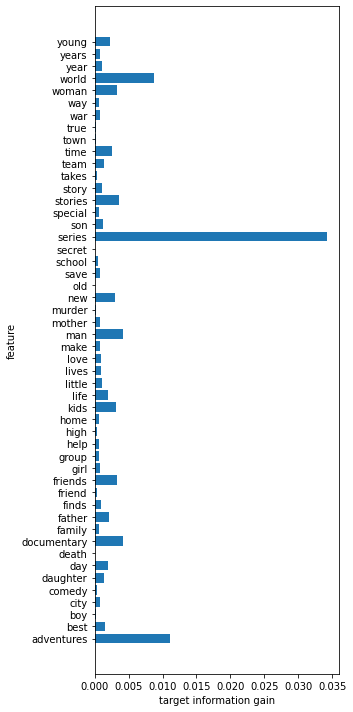

In [36]:
plt.subplots(figsize=(5,10))
plt.barh(list(res.keys()), list(res.values()))
plt.xlabel('target information gain')
plt.ylabel('feature')
plt.tight_layout()

In [37]:
res = dict(zip(cast_vectorizer.get_feature_names_out(),
               MIC(cast_features, df['type'], discrete_features=True)
               ))

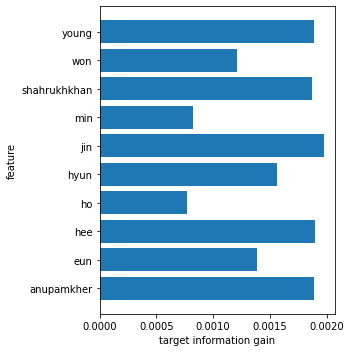

In [38]:
plt.subplots(figsize=(5,5))
plt.barh(list(res.keys()), list(res.values()))
plt.xlabel('target information gain')
plt.ylabel('feature')
plt.tight_layout()

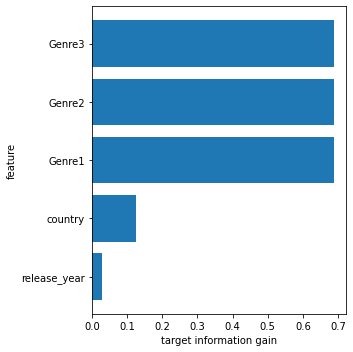

In [39]:
res = dict(zip(['release_year', 'country', 'Genre1', 'Genre2', 'Genre3'],
               MIC(df[['release_year', 'country', 'Genre1', 'Genre2', 'Genre3']], df['type'], discrete_features=True)))
plt.subplots(figsize=(5,5))
plt.barh(list(res.keys()), list(res.values()))
plt.xlabel('target information gain')
plt.ylabel('feature')
plt.tight_layout()

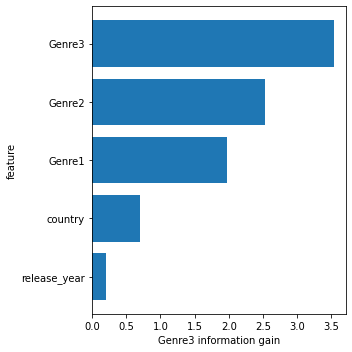

In [40]:
res = dict(zip(['release_year', 'country', 'Genre1', 'Genre2', 'Genre3'],
               MIC(df[['release_year', 'country', 'Genre1', 'Genre2', 'Genre3']], df['Genre3'], discrete_features=True)))
plt.subplots(figsize=(5,5))
plt.barh(list(res.keys()), list(res.values()))
plt.xlabel('Genre3 information gain')
plt.ylabel('feature')
plt.tight_layout()

In [41]:
df.drop(columns=['feature', 'cast'], inplace=True)
type_labelEncoder = sk.preprocessing.LabelEncoder()
df['type'] = type_labelEncoder.fit_transform(df['type'])
df.head()

,type,country,release_year,Genre1,Genre2,Genre3,adventures_dt,best_dt,boy_dt,city_dt,comedy_dt,daughter_dt,day_dt,death_dt,documentary_dt,family_dt,father_dt,finds_dt,friend_dt,friends_dt,girl_dt,group_dt,help_dt,high_dt,home_dt,kids_dt,life_dt,little_dt,lives_dt,love_dt,make_dt,man_dt,mother_dt,murder_dt,new_dt,old_dt,save_dt,school_dt,secret_dt,series_dt,son_dt,special_dt,stories_dt,story_dt,takes_dt,team_dt,time_dt,town_dt,true_dt,war_dt,way_dt,woman_dt,world_dt,year_dt,years_dt,young_dt,anupamkher_c,eun_c,hee_c,ho_c,hyun_c,jin_c,min_c,shahrukhkhan_c,won_c,young_c
0,0,608,2020,6,6,6,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,430,2021,45,56,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,608,2021,59,45,90,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,608,2021,24,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,254,2021,45,43,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
X = df[list(set(df.columns)-set(['type']))]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, df['type'], test_size = 0.1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9953, 65), (9953,), (1106, 65), (1106,))

### `max_depth`:
* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent **over-fitting**.

### `min_samples_split`:
* The minimum number of samples required to split an internal node. we can use this parameter to regularize our tree.

In [59]:
max_Depths = list(range(1,21)) + [50]
res_accuracy = []
for depth in max_Depths:
    dtree = DecisionTreeClassifier(max_depth = depth)
    dtree = dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    res_accuracy.append(accuracy_score(y_test, y_pred))
res_accuracy

[0.6238698010849909,
 0.7540687160940326,
 0.8074141048824593,
 0.8661844484629295,
 0.9376130198915009,
 0.969258589511754,
 0.9900542495479204,
 0.9936708860759493,
 0.9972875226039783,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

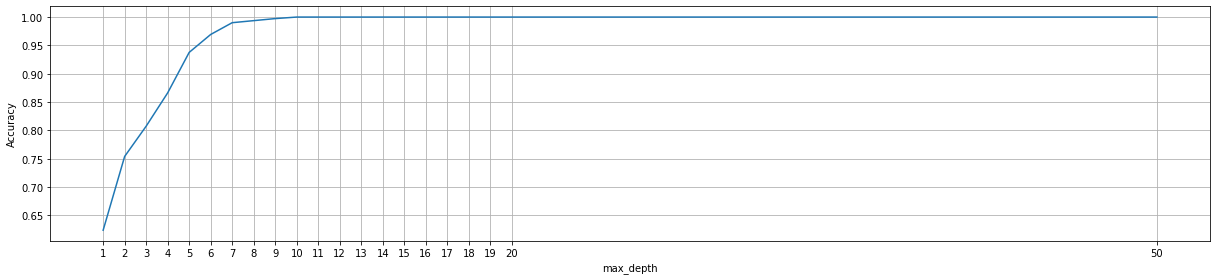

In [60]:
plt.subplots(figsize=(17,4))
plt.plot(max_Depths, res_accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_Depths)
plt.grid()
plt.tight_layout()

In [61]:
min_sample_splits = [2, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 18, 20, 30]
res_accuracy = []
for mss in min_sample_splits:
    dtree = DecisionTreeClassifier(min_samples_split=mss)
    dtree = dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    res_accuracy.append(accuracy_score(y_test, y_pred))
res_accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9990958408679927,
 0.9990958408679927]

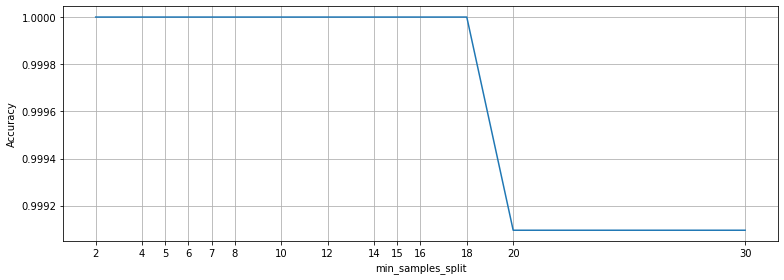

In [62]:
plt.subplots(figsize=(11,4))
plt.plot(min_sample_splits, res_accuracy)
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.xticks(min_sample_splits)
plt.grid()
plt.tight_layout()

In [63]:
tree_para = {'criterion':['gini', 'entropy'],'min_samples_split':min_sample_splits,'max_depth':max_Depths}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(x_train, y_train)
best = grid.best_params_
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=50)


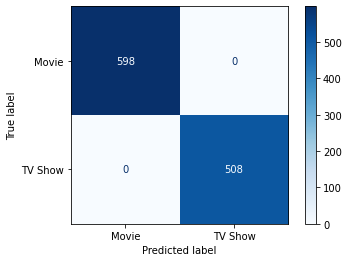

In [64]:
dtree = DecisionTreeClassifier(max_depth=best['max_depth'], min_samples_split=best['min_samples_split'])
# dtree = DecisionTreeClassifier(max_depth=16, min_samples_split=15)
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

* We used $90\%$ of our data to train and $10\%$ of it to test our model. It's a good way to evaluate our model because we can check overfitting or underfitting of our model with these fractions. Obviously, if we use $98\%$ of our data in order to train the model, there's a big chance of **overfitting**, meaning that our model has become too attuned to the data on which it was trained and therefore loses its applicability to any other dataset. Which means that our model can't predict `type` of **unseen** entries well. 
* And if we use just $40\%$ of our data for training, it may be insufficient to achieve a reliable accuracy which we call **underfitting**. In fact, we can say our model is unable to capture the relationship between the input and output variables accurately.

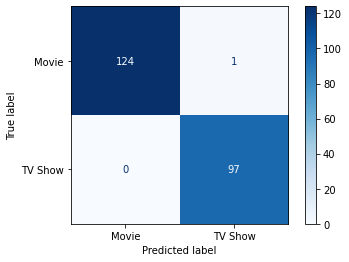

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, df['type'], test_size = 0.02)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

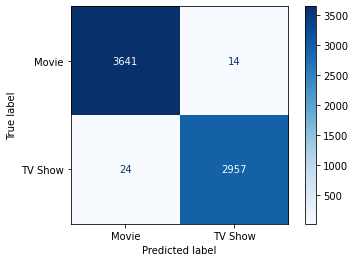

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, df['type'], test_size = 0.6)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

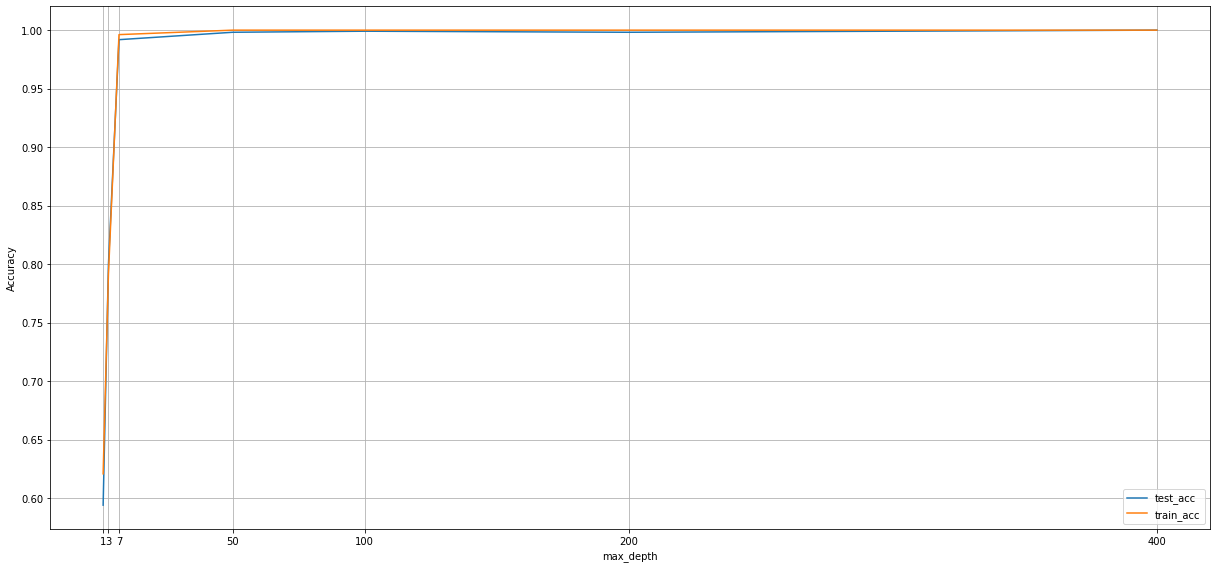

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, df['type'], test_size = 0.1)
max_Depths = [1, 3, 7, 50, 100, 200, 400]
res_accuracy = [[],[]]
for depth in max_Depths:
    dtree = DecisionTreeClassifier(max_depth = depth)
    dtree = dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    res_accuracy[0].append(accuracy_score(y_test, y_pred))
    y_pred = dtree.predict(x_train)
    res_accuracy[1].append(accuracy_score(y_train, y_pred))
plt.subplots(figsize=(17,8))
plt.plot(max_Depths, res_accuracy[0])
plt.plot(max_Depths, res_accuracy[1])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_Depths)
plt.grid()
plt.legend(['test_acc', 'train_acc'])
plt.tight_layout()

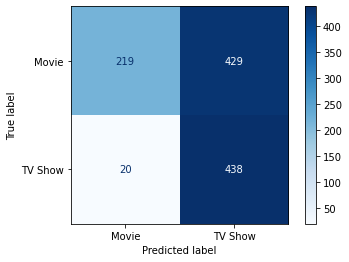

In [68]:
dtree = DecisionTreeClassifier(max_depth=1)
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

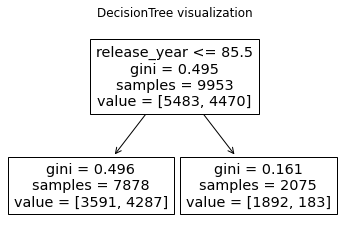

In [69]:
tree.plot_tree(dtree, feature_names=list(df.columns))
plt.title('DecisionTree visualization')
plt.show()

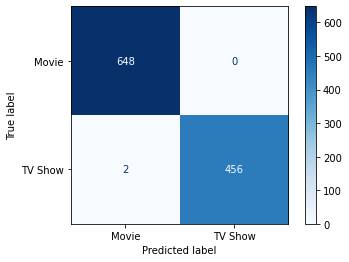

In [70]:
dtree = DecisionTreeClassifier(max_depth=400)
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

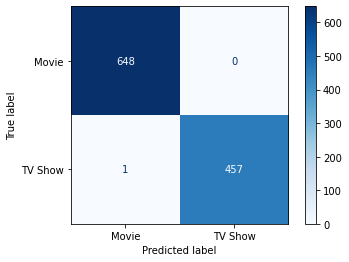

In [71]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

## Ensemble Learning:
### `RandomForestClassifier`:
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

* `n_estimators`: The number of trees in the forest.
    * **More trees = more computation**. Beyond a certain point, the tradeoff may not be worth it.

* `max_depth`: The maximum depth of the tree.

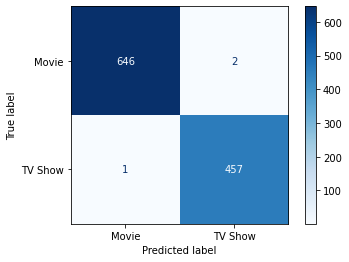

In [72]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
sk.metrics.ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, display_labels=type_labelEncoder.inverse_transform([0,1]), cmap=plt.cm.Blues)

## Bias-Variance Tradeoff:

<img src="https://miro.medium.com/max/875/1*xOZCX3R6-UnqFD51rS-4TQ.png" width="500" height="448" align="center">

* We say our model is biased if it systematically under or over predicts the target variable.

* Variance, in some sense captures the generalizability of the model.

*  What we would like, ideally, is low bias - low variance. 

<img src='https://miro.medium.com/max/615/1*kADA5Q4al9DRLoXck6_6Xw.png' align='center'>

* Random Forest employs a number of techniques to reduce variance in predictions while maintaining the low variance that was characteristic of the lone Decision Tree. It does this primarily by averaging together a number of very weakly correlated (if not completely uncorrelated) trees. [(Source)](https://towardsdatascience.com/random-forests-and-the-bias-variance-tradeoff-3b77fee339b4)
